## Customer Segmentation on Groceries Purchase data
* We apply Customer Segmentation on Groceries Purchase Data.
* The Groceries Purchase Data is composed of customer demoghraphics and purchase information
* With this, we will segment the data in order to form customer segments that have different characteristics.
* In this way, we can derive a marketing strategy where we can target customers for selling certain products and potentially increase customer engagments and purchases.

In [21]:
# Import the libraries
import numpy as np
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import pandas as pd
import seaborn as sns

In [22]:
#Loading the groceries dataset
groceries = pd.read_csv("C:/Users/Karl Retumban/Documents/KAMR/AUS Work/Analytics Portfolio/Git/Gihub Projects/Customer Segmentation/Data/Groceries_purchase.csv", sep=",")
groceries.head(10)

,Civil_Status,Age,Children,Education_Level,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit
0,Single,64,0,Bachelors,58138,1617,635,88,546,172,88,88,3,8,4,7
1,Divorced_Widowed,67,2,Bachelors,46344,27,11,1,6,2,1,6,2,1,2,5
2,Married,56,1,Bachelors,71613,776,426,49,127,111,21,42,1,8,10,4
3,Married,37,2,Bachelors,26646,53,11,4,20,10,3,5,2,2,4,6
4,Married,40,2,Postgraduate,58293,422,173,43,118,46,27,15,5,5,6,5
5,Married,54,2,Postgraduate,62513,716,520,42,98,0,42,14,2,6,10,6
6,Divorced_Widowed,50,1,Bachelors,55635,590,235,65,164,50,49,27,4,7,7,6
7,Married,36,2,Postgraduate,33454,169,76,10,56,3,1,23,2,4,4,8
8,Married,47,2,Postgraduate,30351,46,14,0,24,3,3,2,1,3,2,9
9,Married,71,3,Postgraduate,5648,49,28,0,6,1,1,13,1,1,0,20


In [10]:
# Create dummy variables for civil status and education level
groceries_dta = pd.get_dummies(groceries, columns=['Civil_Status', 'Education_Level'])
groceries_dta.head(10)

,Age,Children,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Civil_Status_Divorced_Widowed,Civil_Status_Married,Civil_Status_Single,Education_Level_Bachelors,Education_Level_High School,Education_Level_Postgraduate
0,64,0,58138,1617,635,88,546,172,88,88,3,8,4,7,0,0,1,1,0,0
1,67,2,46344,27,11,1,6,2,1,6,2,1,2,5,1,0,0,1,0,0
2,56,1,71613,776,426,49,127,111,21,42,1,8,10,4,0,1,0,1,0,0
3,37,2,26646,53,11,4,20,10,3,5,2,2,4,6,0,1,0,1,0,0
4,40,2,58293,422,173,43,118,46,27,15,5,5,6,5,0,1,0,0,0,1
5,54,2,62513,716,520,42,98,0,42,14,2,6,10,6,0,1,0,0,0,1
6,50,1,55635,590,235,65,164,50,49,27,4,7,7,6,1,0,0,1,0,0
7,36,2,33454,169,76,10,56,3,1,23,2,4,4,8,0,1,0,0,0,1
8,47,2,30351,46,14,0,24,3,3,2,1,3,2,9,0,1,0,0,0,1
9,71,3,5648,49,28,0,6,1,1,13,1,1,0,20,0,1,0,0,0,1


In [11]:
#Check column information
groceries_dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            2205 non-null   int64
 1   Children                       2205 non-null   int64
 2   Income                         2205 non-null   int64
 3   Total_Purchase                 2205 non-null   int64
 4   Wines                          2205 non-null   int64
 5   Fruits                         2205 non-null   int64
 6   Meat                           2205 non-null   int64
 7   Fish                           2205 non-null   int64
 8   Vegetables                     2205 non-null   int64
 9   Bread                          2205 non-null   int64
 10  Purchase_with_discounts        2205 non-null   int64
 11  Online_Purchase                2205 non-null   int64
 12  Store_Purchase                 2205 non-null   int64
 13  Web_visit         

#### Data Scaling

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Scaling
scaler = StandardScaler()
scaler.fit(groceries_dta)
groceries_scaled = pd.DataFrame(scaler.transform(groceries_dta),columns= groceries_dta.columns )
print("The data is successfulluy scaled.")
groceries_scaled.head()

The data is successfulluy scaled.


,Age,Children,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Civil_Status_Divorced_Widowed,Civil_Status_Married,Civil_Status_Single,Education_Level_Bachelors,Education_Level_High School,Education_Level_Postgraduate
0,1.017189,-1.759012,0.314651,1.679323,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,-0.562650,0.689203,-0.563907,-1.347625,2.790136,0.990521,-0.359211,-0.784465
1,1.273530,0.448513,-0.254877,-0.963897,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-1.179732,-0.139645,1.773341,-1.347625,-0.358405,0.990521,-0.359211,-0.784465
2,0.333612,-0.655250,0.965354,0.281242,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,1.288596,-0.554069,-0.563907,0.742046,-0.358405,0.990521,-0.359211,-0.784465
3,-1.289883,0.448513,-1.206087,-0.920675,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.562650,0.274779,-0.563907,0.742046,-0.358405,0.990521,-0.359211,-0.784465
4,-1.033542,0.448513,0.322136,-0.307248,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.054432,-0.139645,-0.563907,0.742046,-0.358405,-1.009570,-0.359211,1.274755


In [13]:
# Obtain descriptive statistics
groceries_scaled.describe()

,Age,Children,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Civil_Status_Divorced_Widowed,Civil_Status_Married,Civil_Status_Single,Education_Level_Bachelors,Education_Level_High School,Education_Level_Postgraduate
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,1.447066e-16,2.333231e-16,1.237672e-17,-1.495402e-17,-2.754159e-17,4.823554e-17,2.001422e-17,-3.479202e-17,2.854859e-17,4.093475e-17,4.376444e-16,3.541385e-16,1.487850e-16,9.450742e-17,1.212434e-16,-2.215411e-18,-1.152517e-16,-9.022765e-17,-4.235967e-16,-1.512522e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.315248e+00,-1.759012e+00,-2.409272e+00,-1.000470e+00,-9.073768e-01,-6.638056e-01,-7.592345e-01,-6.888332e-01,-6.597177e-01,-8.517658e-01,-1.229460e+00,-1.498347e+00,-1.796814e+00,-2.211765e+00,-5.639075e-01,-1.347625e+00,-3.584054e-01,-1.009570e+00,-3.592106e-01,-7.844645e-01
25%,-6.917534e-01,-6.552495e-01,-7.932106e-01,-8.940766e-01,-8.362482e-01,-6.135234e-01,-6.857507e-01,-6.341008e-01,-6.353993e-01,-6.777670e-01,-6.991473e-01,-7.675672e-01,-8.711908e-01,-9.684928e-01,-5.639075e-01,-1.347625e+00,-3.584054e-01,-1.009570e+00,-3.592106e-01,-7.844645e-01
50%,-9.362368e-02,4.485131e-01,-1.618161e-02,-3.488084e-01,-3.798401e-01,-4.626766e-01,-4.469284e-01,-4.699038e-01,-4.651706e-01,-3.684357e-01,-1.688343e-01,-3.678755e-02,-2.541090e-01,2.747790e-01,-5.639075e-01,7.420464e-01,-3.584054e-01,9.905211e-01,-3.592106e-01,-7.844645e-01
75%,8.462945e-01,4.485131e-01,8.044529e-01,7.317536e-01,5.952136e-01,1.658516e-01,3.062803e-01,2.233725e-01,1.671076e-01,2.308937e-01,3.614786e-01,6.939921e-01,6.715138e-01,6.892030e-01,-5.639075e-01,7.420464e-01,-3.584054e-01,9.905211e-01,-3.592106e-01,1.274755e+00
max,2.469790e+00,2.656038e+00,2.999363e+00,3.188785e+00,3.517411e+00,4.339279e+00,7.163236e+00,4.036392e+00,5.711701e+00,5.354193e+00,6.725234e+00,8.367179e+00,2.214218e+00,6.076714e+00,1.773341e+00,7.420464e-01,2.790136e+00,9.905211e-01,2.783882e+00,1.274755e+00


#### Identify optimal number of clusters 
* We use Kmeans in identifying the optimal number of clusters.
* The optimal number of cluster identified is 5.

Elbow Method to determine the number of clusters to be formed:


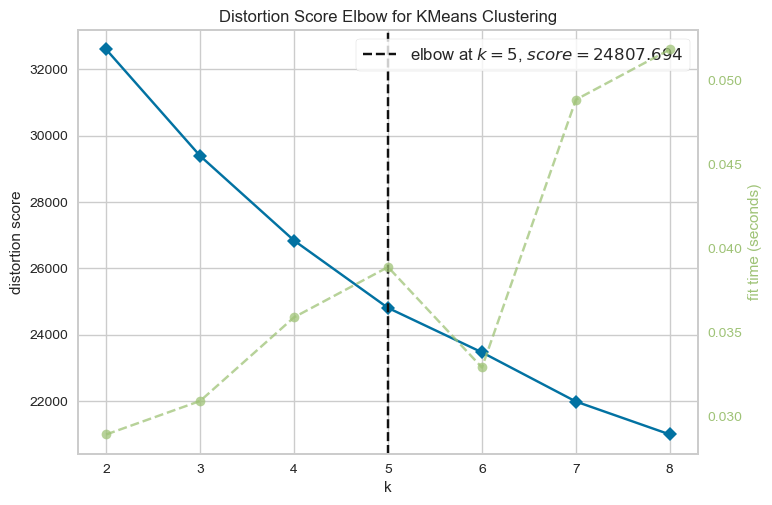

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# K-means Algorithm
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Determine the optimal number of clusters using the K-means Elbow method
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=8)
Elbow_M.fit(groceries_scaled)
Elbow_M.show()

The optimal number of clusters is 5. We partition our data using K-means clustering algorithm into 5 clusters or segments.

In [26]:
# Apply K-means Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=1234)
y_clusters = kmeans.fit_predict(groceries_scaled)

#Add the assigned clusters to the data
groceries["Clusters"] = y_clusters

# Check the data
groceries.head()

,Civil_Status,Age,Children,Education_Level,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Clusters
0,Single,64,0,Bachelors,58138,1617,635,88,546,172,88,88,3,8,4,7,2
1,Divorced_Widowed,67,2,Bachelors,46344,27,11,1,6,2,1,6,2,1,2,5,0
2,Married,56,1,Bachelors,71613,776,426,49,127,111,21,42,1,8,10,4,4
3,Married,37,2,Bachelors,26646,53,11,4,20,10,3,5,2,2,4,6,3
4,Married,40,2,Postgraduate,58293,422,173,43,118,46,27,15,5,5,6,5,1


#### Customer Segment Profiling
* We now identify the customer segment profile and evaluate the varying characteristics of each cluster.

Clusters
0    459
1    421
2    203
3    688
4    434
Name: Age, dtype: int64

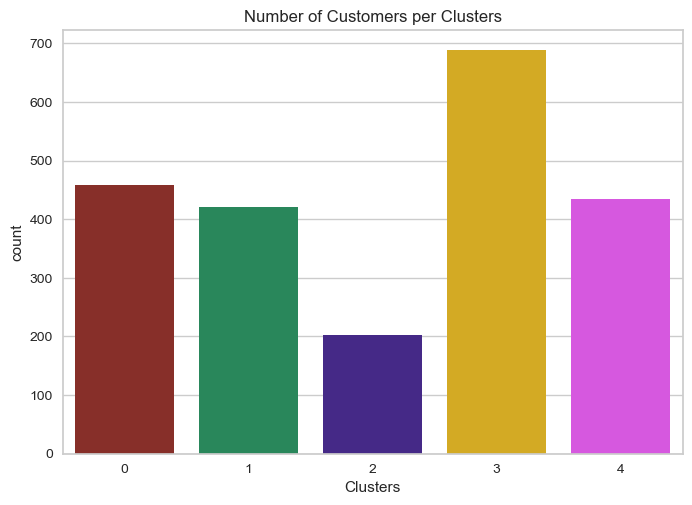

In [42]:
# Observations per cluster
pal = ["#96221a","#1a965c", "#3f1a96","#f0b907","#e942f5"]
pl = sns.countplot(x=groceries["Clusters"], palette= pal)
pl.set_title("Number of Customers per Clusters")

# Count per clusters
groceries.groupby('Clusters')['Age'].count()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,38704.749455,14541.688093,1730.0,29002.5,38513.0,48623.5,79803.0
1,421.0,58433.465558,11317.177262,2447.0,52278.0,59292.0,65352.0,93404.0
2,203.0,74328.438424,13586.210966,22507.0,68203.5,75345.0,82669.5,113734.0
3,688.0,35122.844477,12468.746952,4023.0,26085.0,34935.0,43140.5,71322.0
4,434.0,74210.967742,9769.120738,32632.0,68143.5,74951.5,80536.5,105471.0


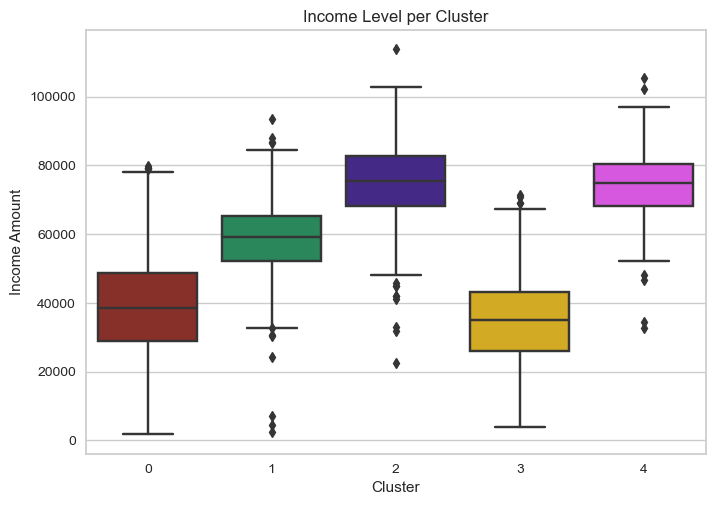

In [34]:
# By Income
bplot = sns.boxplot(x='Clusters',y='Income', data=groceries, palette=pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Income Amount')
bplot.set_title('Income Level per Cluster')

groceries.groupby('Clusters')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,38704.749455,14541.688093,1730.0,29002.5,38513.0,48623.5,79803.0
1,421.0,58433.465558,11317.177262,2447.0,52278.0,59292.0,65352.0,93404.0
2,203.0,74328.438424,13586.210966,22507.0,68203.5,75345.0,82669.5,113734.0
3,688.0,35122.844477,12468.746952,4023.0,26085.0,34935.0,43140.5,71322.0
4,434.0,74210.967742,9769.120738,32632.0,68143.5,74951.5,80536.5,105471.0


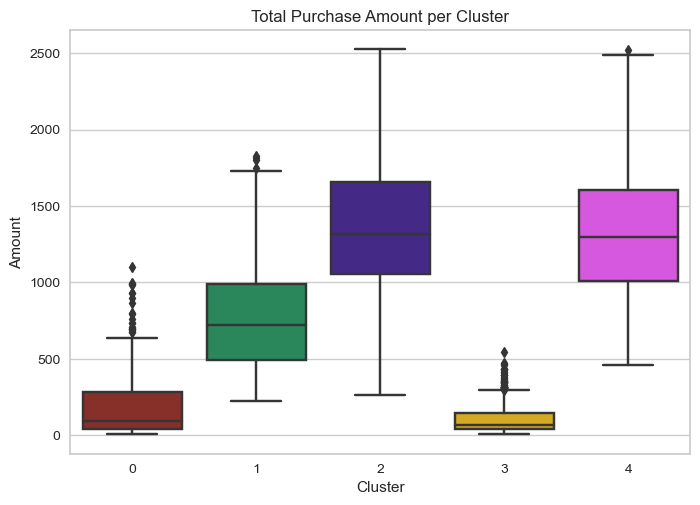

In [74]:
# By Spendings
bplot = sns.boxplot(x='Clusters',y='Total_Purchase', data=groceries, palette=pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Amount')
bplot.set_title('Total Purchase Amount per Cluster')

groceries.groupby('Clusters')['Income'].describe()

Text(0.5, 1.0, ' Income vs Total Purchase')

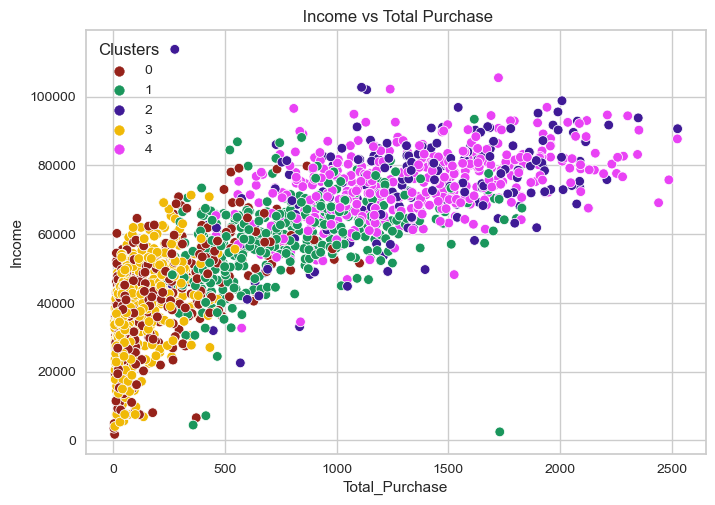

In [37]:
# Spendings vs Income
pl = sns.scatterplot(data = groceries,x=groceries["Total_Purchase"], y=groceries["Income"], hue=groceries["Clusters"], palette= pal)
pl.set_title(" Income vs Total Purchase")

count        mean         std   min     25%    50%  \
Clusters Product                                                          
0        Bread       459.0   23.466231   30.443240   0.0    5.00   13.0   
         Fish        459.0    9.875817   14.310188   0.0    2.00    4.0   
         Fruits      459.0    7.668845   12.284622   0.0    1.00    3.0   
         Meat        459.0   41.193900   51.476449   0.0    9.00   21.0   
         Vegetables  459.0    7.363834   11.666606   0.0    1.00    3.0   
         Wines       459.0   99.629630  144.021689   0.0   10.50   37.0   
1        Bread       421.0   60.320665   55.845145   0.0   19.00   40.0   
         Fish        421.0   25.140143   29.562232   0.0    4.00   16.0   
         Fruits      421.0   17.988124   20.793940   0.0    3.00   11.0   
         Meat        421.0  138.249406  117.941883  12.0   71.00  115.0   
         Vegetables  421.0   18.111639   22.544335   0.0    3.00   11.0   
         Wines       421.0  514.954869  295.626051   1.0  292.00  462.0   
2        Bread       203.0   74.921182   59.380079   0.0   31.50   53.0   
         Fish        203.0   89.911330   63.473016   0.0   39.00   72.0   
         Fruits      203.0   62.960591   50.104726   0.0   23.50   47.0   
         Meat        203.0  454.472906  249.392595   3.0  245.50  425.0   
         Vegetables  203.0   64.876847   51.981143   0.0   20.50   54.0   
         Wines       203.0  600.009852  325.991557   6.0  344.50  556.0   
3        Bread       688.0   15.821221   19.135806   0.0    4.00   10.0   
         Fish        688.0    8.526163   16.102453   0.0    2.00    3.0   
         Fruits      688.0    5.540698    9.436901   0.0    0.00    2.0   
         Meat        688.0   24.094477   24.542595   1.0    8.00   15.0   
         Vegetables  688.0    5.585756    8.420961   0.0    0.75    3.0   
         Wines       688.0   46.348837   58.067900   0.0    8.00   23.0   
4        Bread       434.0   80.382488   60.418795   0.0   33.00   61.0   
         Fish        434.0  101.423963   65.343152   0.0   46.75   93.0   
         Fruits      434.0   70.352535   49.699723   0.0   28.00   60.0   
         Meat        434.0  411.444700  215.650802  85.0  244.00  385.0   
         Vegetables  434.0   73.271889   50.677669   0.0   31.25   60.0   
         Wines       434.0  596.490783  313.538246  63.0  358.25  532.0   

                        75%     max  
Clusters Product                     
0        Bread        31.00   262.0  
         Fish         12.00   102.0  
         Fruits        8.00    90.0  
         Meat         52.00   309.0  
         Vegetables    9.00    78.0  
         Wines       142.00   789.0  
1        Bread        88.00   321.0  
         Fish         36.00   223.0  
         Fruits       26.00   138.0  
         Meat        171.00  1725.0  
         Vegetables   25.00   150.0  
         Wines       670.00  1459.0  
2        Bread       108.00   246.0  
         Fish        135.50   250.0  
         Fruits       91.50   194.0  
         Meat        612.00   984.0  
         Vegetables   96.00   262.0  
         Wines       846.00  1462.0  
3        Bread        20.00   153.0  
         Fish         10.00   179.0  
         Fruits        6.00   103.0  
         Meat         29.25   137.0  
         Vegetables    7.00    66.0  
         Wines        62.00   309.0  
4        Bread       116.75   249.0  
         Fish        150.00   259.0  
         Fruits      105.00   199.0  
         Meat        543.75   981.0  
         Vegetables  107.00   197.0  
         Wines       794.75  1493.0

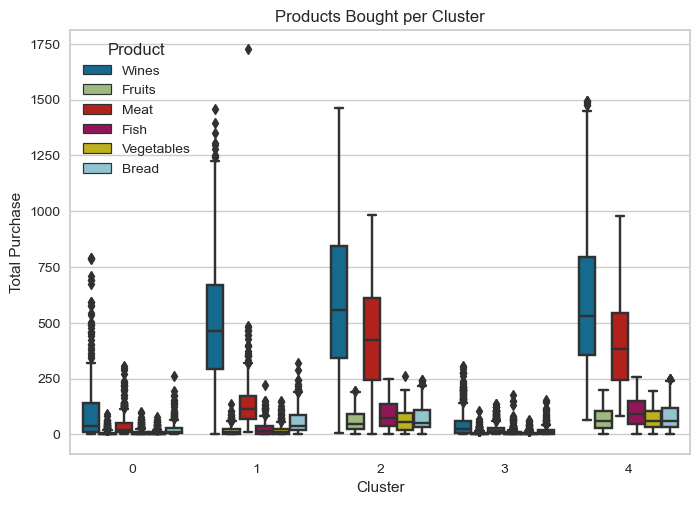

In [40]:
# Total Purchase by Products
Wines = groceries[["Wines","Clusters"]].rename(columns={"Wines": 'Purchase'})
Wines["Product"] = 'Wines' 
Fruits = groceries[["Fruits","Clusters"]].rename(columns={"Fruits": 'Purchase'})
Fruits["Product"] = 'Fruits' 
Meat = groceries[["Meat","Clusters"]].rename(columns={"Meat": 'Purchase'})
Meat["Product"] = 'Meat' 
Fish = groceries[["Fish","Clusters"]].rename(columns={"Fish": 'Purchase'})
Fish["Product"] = 'Fish' 
Vegetables = groceries[["Vegetables","Clusters"]].rename(columns={"Vegetables": 'Purchase'})
Vegetables["Product"] = 'Vegetables' 
Bread = groceries[["Bread","Clusters"]].rename(columns={"Bread": 'Purchase'})
Bread["Product"] = 'Bread'  

Products = Wines.append(Fruits).append(Meat).append(Fish).append(Vegetables).append(Bread)


bplot = sns.boxplot(x='Clusters',y='Purchase', data=Products, hue='Product' )
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Total Purchase')
bplot.set_title('Products Bought per Cluster')

Products.groupby(['Clusters', 'Product'])['Purchase'].describe()


Text(0.5, 1.0, 'Total Purchase per Product')

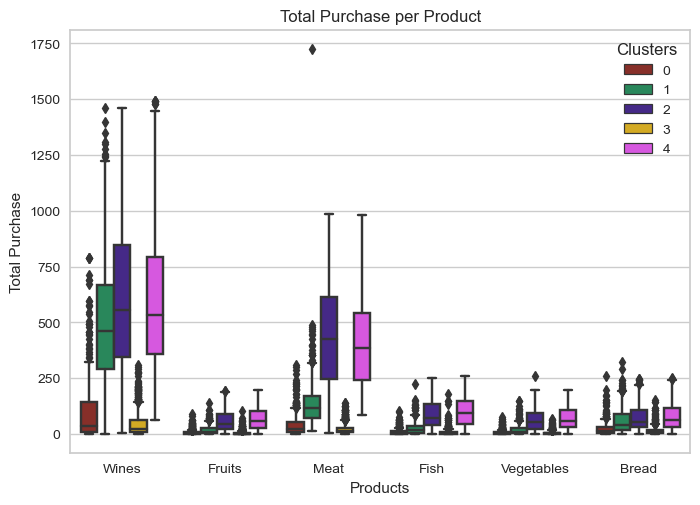

In [76]:
# By Products by Total Spendings
bplot = sns.boxplot(x='Product',y='Purchase', data=Products, hue="Clusters" ,  palette= pal)
bplot.set_xlabel('Products')
bplot.set_ylabel('Total Purchase')
bplot.set_title('Total Purchase per Product')

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,2.442266,1.730298,0.0,1.0,2.0,3.0,15.0
1,421.0,3.976247,2.552199,0.0,2.0,3.0,5.0,15.0
2,203.0,1.059113,0.541773,0.0,1.0,1.0,1.0,3.0
3,688.0,2.020349,1.330263,0.0,1.0,2.0,3.0,15.0
4,434.0,1.640553,1.282253,0.0,1.0,1.0,2.0,10.0


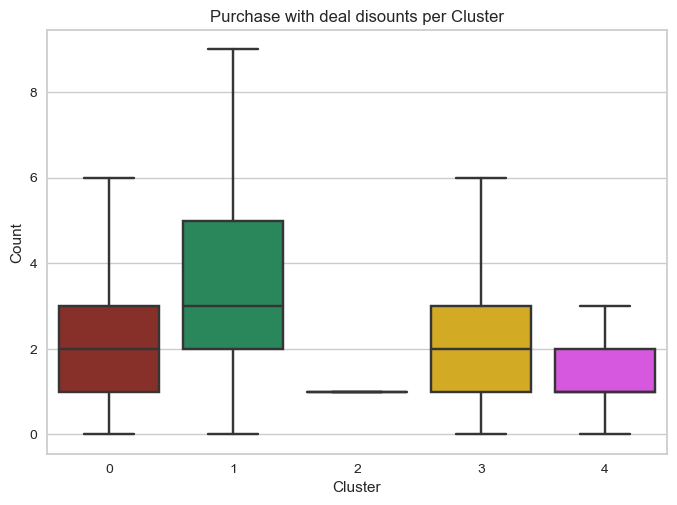

In [49]:
# By Purchase with discount deals
bplot = sns.boxplot(x='Clusters',y='Purchase_with_discounts', data=groceries, palette= pal, showfliers=False )
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Count')
bplot.set_title('Purchase with deal disounts per Cluster')

groceries.groupby(['Clusters'])['Purchase_with_discounts'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,3.869281,1.877328,0.0,3.0,3.0,4.0,12.0
1,421.0,7.855107,2.699277,0.0,6.0,8.0,10.0,13.0
2,203.0,8.408867,2.781715,0.0,6.0,8.0,11.0,13.0
3,688.0,3.354651,1.168152,0.0,3.0,3.0,4.0,10.0
4,434.0,8.624424,2.860006,4.0,6.0,9.0,11.0,13.0


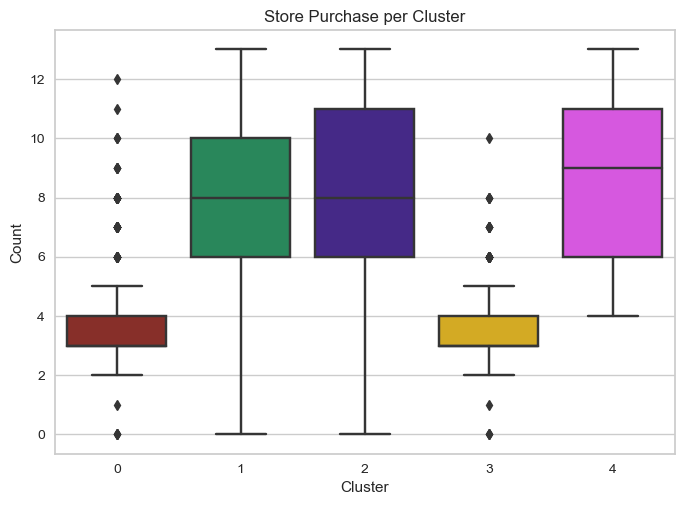

In [50]:
# By Store_Purchase
bplot = sns.boxplot(x='Clusters',y='Store_Purchase', data=groceries , palette= pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Count')
bplot.set_title('Store Purchase per Cluster')

groceries.groupby(['Clusters'])['Store_Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,6.403050,2.039156,1.0,5.0,7.0,8.0,20.0
1,421.0,5.779097,1.955734,0.0,5.0,6.0,7.0,10.0
2,203.0,2.866995,1.984356,0.0,1.0,2.0,4.0,9.0
3,688.0,6.396802,1.926855,1.0,5.0,7.0,8.0,20.0
4,434.0,3.255760,1.852911,0.0,2.0,3.0,5.0,9.0


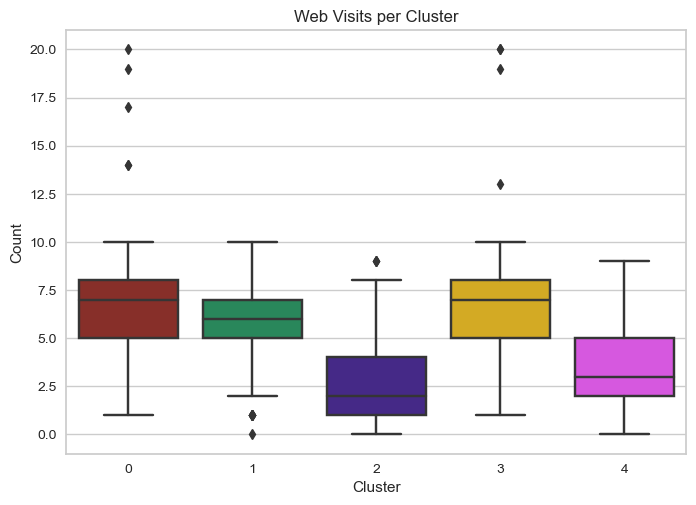

In [54]:
# By Web visit
bplot = sns.boxplot(x='Clusters',y='Web_visit', data=groceries, palette= pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Count')
bplot.set_title('Web Visits per Cluster')

groceries.groupby(['Clusters'])['Web_visit'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,2.869281,2.044354,0.0,1.0,2.0,4.0,10.0
1,421.0,6.496437,2.586248,0.0,5.0,6.0,8.0,25.0
2,203.0,5.049261,2.647161,1.0,3.0,5.0,6.0,27.0
3,688.0,2.177326,1.304101,0.0,1.0,2.0,3.0,8.0
4,434.0,5.684332,2.294563,1.0,4.0,5.0,7.0,11.0


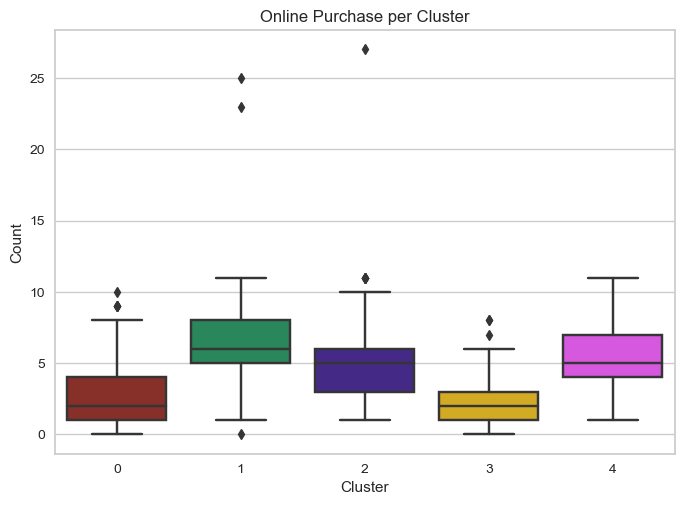

In [57]:
# By Online Purchase
bplot = sns.boxplot(x='Clusters',y='Online_Purchase', data=groceries, palette= pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Count')
bplot.set_title('Online Purchase per Cluster')

groceries.groupby(['Clusters'])['Online_Purchase'].describe()

#### Customer Demographics

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,38704.749455,14541.688093,1730.0,29002.5,38513.0,48623.5,79803.0
1,421.0,58433.465558,11317.177262,2447.0,52278.0,59292.0,65352.0,93404.0
2,203.0,74328.438424,13586.210966,22507.0,68203.5,75345.0,82669.5,113734.0
3,688.0,35122.844477,12468.746952,4023.0,26085.0,34935.0,43140.5,71322.0
4,434.0,74210.967742,9769.120738,32632.0,68143.5,74951.5,80536.5,105471.0


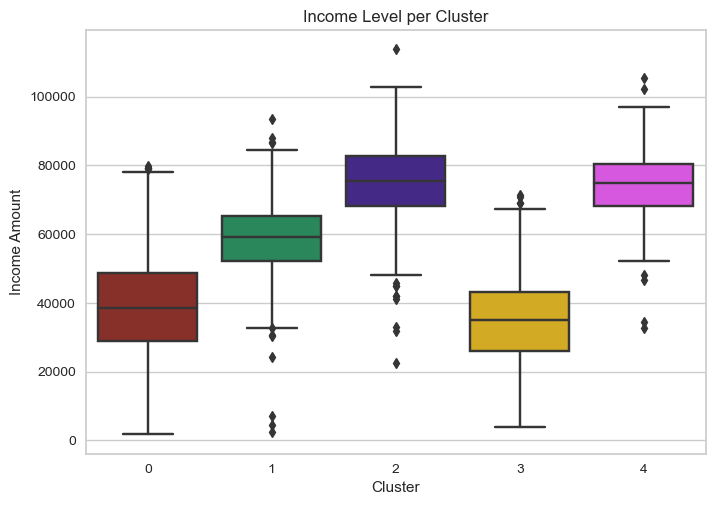

In [58]:
# By Income
bplot = sns.boxplot(x='Clusters',y='Income', data=groceries, palette=pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Income Amount')
bplot.set_title('Income Level per Cluster')

groceries.groupby('Clusters')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,50.840959,11.207977,26.0,43.00,50.0,58.0,81.0
1,421.0,55.973872,10.173344,32.0,48.00,56.0,65.0,78.0
2,203.0,52.231527,14.894035,26.0,39.00,53.0,65.0,78.0
3,688.0,49.713663,10.891725,25.0,42.00,48.0,57.0,75.0
4,434.0,53.373272,12.064447,27.0,44.25,52.0,63.0,80.0


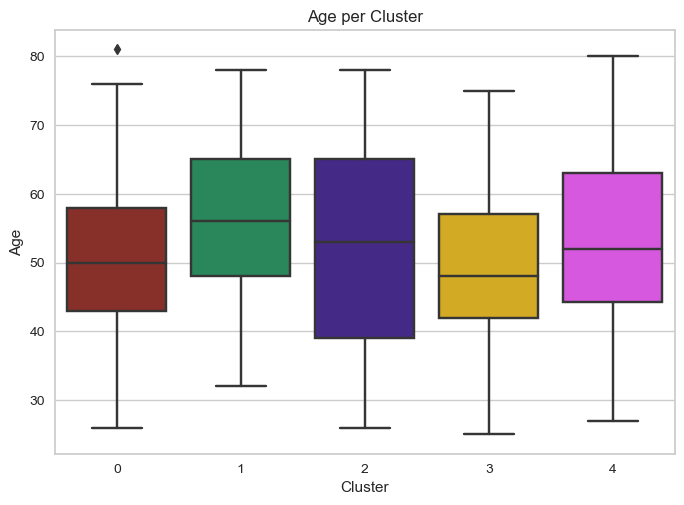

In [59]:
# By Age
bplot = sns.boxplot(x='Clusters',y='Age', data=groceries, palette=pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('Age')
bplot.set_title('Age per Cluster')


groceries.groupby('Clusters')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,459.0,1.233115,0.680445,0.0,1.0,1.0,2.0,3.0
1,421.0,2.002375,0.681381,1.0,2.0,2.0,2.0,4.0
2,203.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,688.0,2.236919,0.695570,1.0,2.0,2.0,3.0,4.0
4,434.0,1.304147,0.489739,1.0,1.0,1.0,2.0,3.0


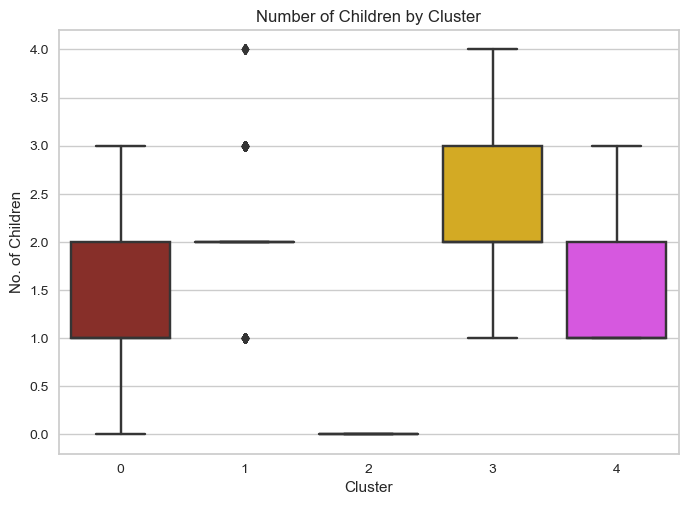

In [60]:
# Children
bplot = sns.boxplot(x='Clusters',y='Children', data=groceries , palette= pal)
bplot.set_xlabel('Cluster')
bplot.set_ylabel('No. of Children')
bplot.set_title('Number of Children by Cluster')

groceries.groupby('Clusters')['Children'].describe()

Clusters  Education_Level
0         Bachelors          239
          High School         58
          Postgraduate       162
1         Bachelors          137
          High School         17
          Postgraduate       267
2         Bachelors          103
          High School         16
          Postgraduate        84
3         Bachelors          354
          High School        116
          Postgraduate       218
4         Bachelors          280
          High School         45
          Postgraduate       109
Name: Education_Level, dtype: int64

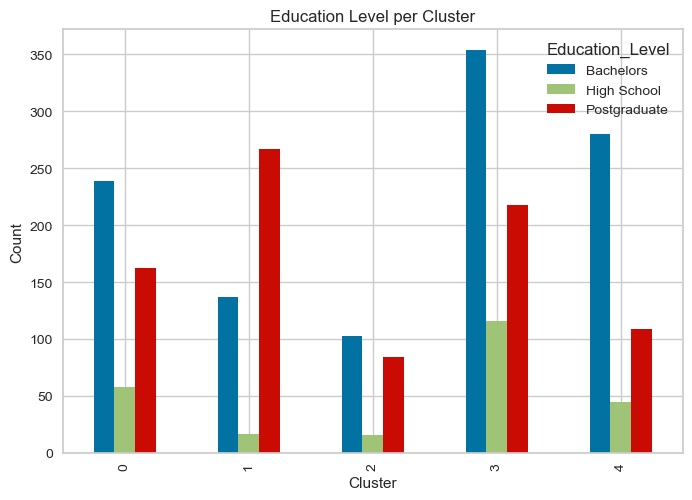

In [73]:
# By Education
bar = groceries.groupby(['Clusters', 'Education_Level']).size().unstack().plot(kind='bar', stacked=False)

bar.set_xlabel('Cluster')
bar.set_ylabel('Count')
bar.set_title('Education Level per Cluster')

groceries.groupby(['Clusters','Education_Level'])['Education_Level'].count()

Clusters  Civil_Status    
0         Divorced_Widowed    411
          Single               48
1         Divorced_Widowed     67
          Married             354
2         Single              203
3         Married             688
4         Divorced_Widowed     54
          Married             380
Name: Civil_Status, dtype: int64

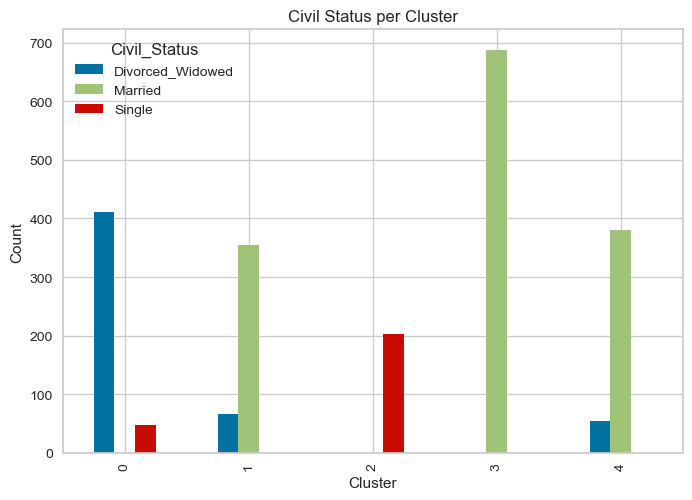

In [62]:
# Civil Status
bar = groceries.groupby(['Clusters', 'Civil_Status']).size().unstack().plot(kind='bar', stacked=False)

bar.set_xlabel('Cluster')
bar.set_ylabel('Count')
bar.set_title('Civil Status per Cluster')

groceries.groupby(['Clusters','Civil_Status'])['Civil_Status'].count()

#### Segment Classification of new customers 
* We now classify on which segment the new customers belong.
* Using the model above, and given the new customer data, we will predict their cluster group. 

In [69]:
#Loading the new customers dataset
new_batch = pd.read_csv("C:/Users/Karl Retumban/Documents/KAMR/AUS Work/Analytics Portfolio/Git/Gihub Projects/Customer Segmentation/Data/New_customers.csv", sep=",")
new_batch.head()


,Civil_Status,Age,Children,Education_Level,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit
0,Single,49,0,Postgraduate,67189,1488,589,65,458,185,96,95,7,9,5,11
1,Single,52,0,Bachelors,59875,1709,685,96,596,156,88,88,3,8,4,7
2,Divorced_Widowed,62,5,Bachelors,49623,63,28,6,15,7,1,6,2,1,2,5
3,Married,53,3,High School,74526,737,395,55,101,123,21,42,1,8,10,4
4,Married,38,1,Bachelors,29586,105,25,11,36,25,3,5,2,2,4,6


In [70]:
# Create dummy variables for civil status and education level
newbatch = pd.get_dummies(new_batch, columns=['Civil_Status', 'Education_Level'])
newbatch.head()

,Age,Children,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Civil_Status_Divorced_Widowed,Civil_Status_Married,Civil_Status_Single,Education_Level_Bachelors,Education_Level_High School,Education_Level_Postgraduate
0,49,0,67189,1488,589,65,458,185,96,95,7,9,5,11,0,0,1,0,0,1
1,52,0,59875,1709,685,96,596,156,88,88,3,8,4,7,0,0,1,1,0,0
2,62,5,49623,63,28,6,15,7,1,6,2,1,2,5,1,0,0,1,0,0
3,53,3,74526,737,395,55,101,123,21,42,1,8,10,4,0,1,0,0,1,0
4,38,1,29586,105,25,11,36,25,3,5,2,2,4,6,0,1,0,1,0,0


In [71]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(newbatch)
newbatch_scaled = pd.DataFrame(scaler.transform(newbatch),columns= newbatch.columns )

In [72]:
# Predict the cluster of new customers
predicted_cluster = kmeans.predict(newbatch_scaled)
new_batch["Clusters"] = predicted_cluster
new_batch.head()

,Civil_Status,Age,Children,Education_Level,Income,Total_Purchase,Wines,Fruits,Meat,Fish,Vegetables,Bread,Purchase_with_discounts,Online_Purchase,Store_Purchase,Web_visit,Clusters
0,Single,49,0,Postgraduate,67189,1488,589,65,458,185,96,95,7,9,5,11,1
1,Single,52,0,Bachelors,59875,1709,685,96,596,156,88,88,3,8,4,7,4
2,Divorced_Widowed,62,5,Bachelors,49623,63,28,6,15,7,1,6,2,1,2,5,0
3,Married,53,3,High School,74526,737,395,55,101,123,21,42,1,8,10,4,1
4,Married,38,1,Bachelors,29586,105,25,11,36,25,3,5,2,2,4,6,3


####                                                              *** E N D ***